<a href="https://colab.research.google.com/github/UmitOzteker/TensorFlow-Projects/blob/main/02_neural_network_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow İle Neural Network Classification

Veri analizinde kullanılan yöntemleri uygulayarak verileri sınıflandırma, bir dizi girdi verisi için sınıflandırma modelleri oluşturmak için kullanılan bir prosedürdür

Classification Tipleri:
* Binary Classification
* Multiclass Classification
* Multilabel Classification

# Data Oluşturma

In [1]:
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples,
     noise=0.03,
     random_state=42)

Make Circles 2d boyutunda büyük bir dairenin içine küçük bir daire oluşturur

* **noise parametresi**: Bu parametre veri noktalarına eklenen rastgele hatanın şiddetini belirler. 0.03'lük bir değer, gürültünün neden olduğu maksimum yer değiştirmenin dairelerin yarıçaplarının %3'ü olacağı anlamına gelir. Basitçe ifade edersek, mükemmel dairelerin etrafında hafif bir bulanıklık oluşturur.

In [2]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [4]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0],"X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


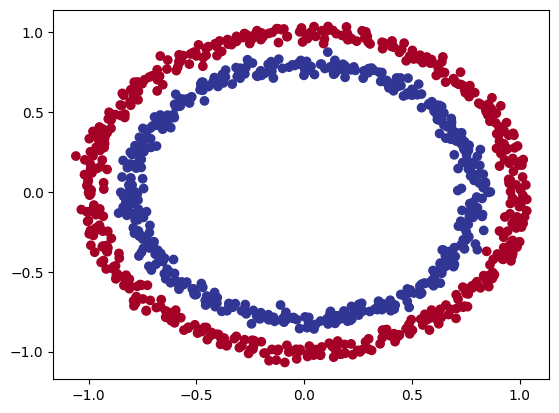

In [5]:
# plot ile Görselleştirme
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

# Input ve Output Şekilleri

In [6]:
 # Label ve feature'ların şekillerinin kontrolü
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
len(X), len(y)

(1000, 1000)

In [8]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

# Modelleme Adımları

In [9]:
import tensorflow as tf
tf.random.set_seed(42)

# Model Oluşturma
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Modeli Compile Etme
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["accuracy"])

# Modeli Fit Etme
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 7ms/step - loss: 2.3147 - accuracy: 0.4973
Epoch 2/5
32/32 [==============================] - 0s 6ms/step - loss: 0.7394 - accuracy: 0.5003
Epoch 3/5
32/32 [==============================] - 0s 5ms/step - loss: 0.7073 - accuracy: 0.5007
Epoch 4/5
32/32 [==============================] - 0s 5ms/step - loss: 0.6982 - accuracy: 0.4994
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.6952 - accuracy: 0.4973


In [10]:
# Daha uzun eğiterek modeli geliştirme

model.fit(tf.expand_dims(X, axis=-1), y, epochs=200)
model.evaluate(X, y)

Epoch 1/200
32/32 [==============================] - 0s 6ms/step - loss: 0.6941 - accuracy: 0.5001
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.4979
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4877
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.4886
Epoch 5/200
32/32 [==============================] - 0s 5ms/step - loss: 0.6936 - accuracy: 0.4918
Epoch 6/200
32/32 [==============================] - 0s 9ms/step - loss: 0.6932 - accuracy: 0.5098
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6938 - accuracy: 0.4986
Epoch 8/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6937 - accuracy: 0.4730
Epoch 9/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.4896
Epoch 10/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6933 - accuracy: 0.4980
Epoch 11/

[0.6934650540351868, 0.5]

In [11]:
tf.random.set_seed(42)

# Model Oluşturma
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Modeli Compile Etme
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# Modeli Fit Etme
model_2.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0)

In [12]:
# Modeli Evaluate etme
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

In [13]:
circles["label"].value_counts()

1    500
0    500
Name: label, dtype: int64

#Modeli Geliştirme

In [14]:
tf.random.set_seed(42)

# Model Oluşturma
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Modeli Compile Etme
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Modeli Fit Etme
model_3.fit(tf.expand_dims(X, axis=-1),y , epochs=100, verbose=0)



In [15]:
# Modeli Evaluate etme
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5000


[0.6940096616744995, 0.5]

In [16]:
model_3.predict(X)

32/32 [==============================] - 0s 2ms/step


array([[[0.5223652 ],
        [0.521125  ]],

       [[0.51878184],
        [0.5209394 ]],

       [[0.5186413 ],
        [0.520987  ]],

       ...,

       [[0.52025104],
        [0.51865417]],

       [[0.52216625],
        [0.51875496]],

       [[0.5212426 ],
        [0.5228626 ]]], dtype=float32)

Tahminleri görselleştirmek için fonksiyon oluşturma

In [17]:
import numpy as np

def plot_decision_boundary(model, X, y):

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classifcation...


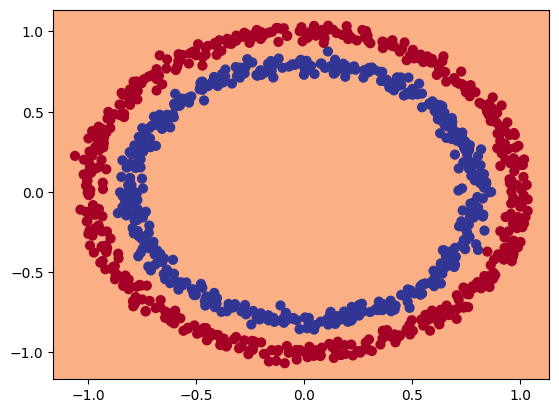

In [18]:
# Tahminleri Kontrol Etm
plot_decision_boundary(model_3, X, y)

In [19]:
tf.random.set_seed(42)

# Regression veri Oluşturma
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5)

X_regression, y_regression

# Veriyi eğitim ve test verisine bölme
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Modeli regression data ile fit etme
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 8ms/step - loss: -6866.9243 - accuracy: 0.0000e+00
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: -7146.6465 - accuracy: 0.0000e+00
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: -7162.6489 - accuracy: 0.0000e+00
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 5/100
5/5 [==============================] - 0s 7ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: -7190.0156 - accuracy: 0.0000e+00
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: -7190.0151 - accuracy: 0.0000e+00
Epoch 10/100
5/5 [==============================] - 0s 

Model 3 binary classification problem için hazırlandığı için yukarıda çalışmadı


In [20]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile
model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# Fit
model_4.fit(tf.expand_dims(X_reg_train, axis=-1), y_reg_train, epochs=100)

Epoch 1/100
5/5 [==============================] - 2s 7ms/step - loss: 363.9159 - mae: 363.9159
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 241.7597 - mae: 241.7597
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 122.9681 - mae: 122.9681
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 49.9805 - mae: 49.9805
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 81.0446 - mae: 81.0446
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 67.0714 - mae: 67.0714
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 43.3615 - mae: 43.3615
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 51.0487 - mae: 51.0487
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 41.8042 - mae: 41.8042
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 44.9470 - mae: 44.9470
Epoch 11/100
5/5 [==============================] - 0

2/2 [==============================] - 0s 9ms/step


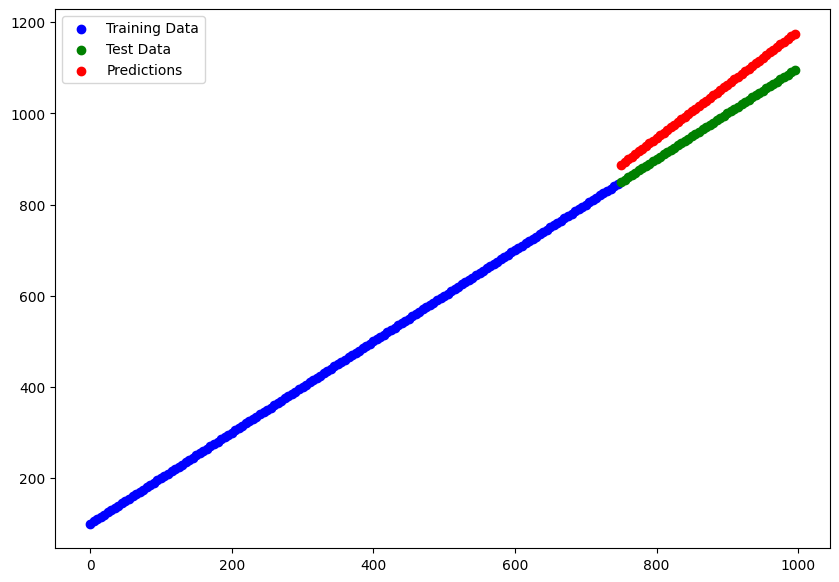

In [21]:
y_reg_preds = model_4.predict(X_reg_test)

plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training Data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test Data")
plt.scatter(X_reg_test, y_reg_preds, c="r", label="Predictions")
plt.legend();

In [22]:
tf.random.set_seed(42)

model_5= tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

history = model_5.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 6ms/step - loss: 4.9542 - accuracy: 0.5013
Epoch 2/100
32/32 [==============================] - 0s 5ms/step - loss: 4.9162 - accuracy: 0.5017
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 4.8862 - accuracy: 0.5003
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 4.8653 - accuracy: 0.4998
Epoch 5/100
32/32 [==============================] - 0s 5ms/step - loss: 4.8522 - accuracy: 0.5002
Epoch 6/100
32/32 [==============================] - 0s 5ms/step - loss: 4.7967 - accuracy: 0.4997
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 4.7983 - accuracy: 0.4992
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 4.7572 - accuracy: 0.4999
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 4.7142 - accuracy: 0.4982
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 4.7132 - accuracy: 0.4988
Epoch 11/

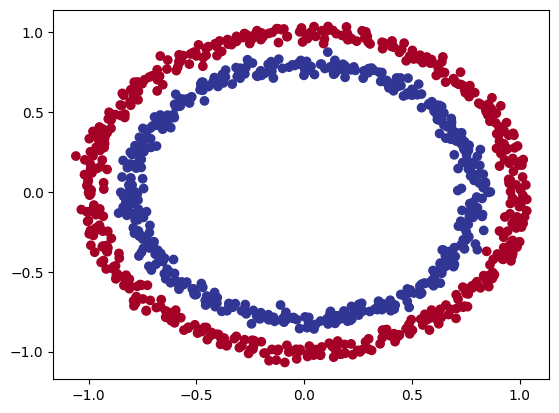

In [23]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 [==============================] - 1s 3ms/step
doing binary classifcation...


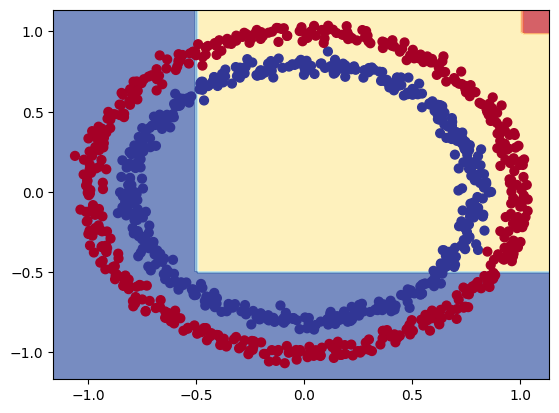

In [24]:
plot_decision_boundary(model_5, X, y)

In [25]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

model_6.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

model_6.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 4.2732 - accuracy: 0.4965
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 4.2070 - accuracy: 0.4970
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1999 - accuracy: 0.4970
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1769 - accuracy: 0.4982
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1465 - accuracy: 0.4965
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1533 - accuracy: 0.4977
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 4.1329 - accuracy: 0.4990
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 4.1088 - accuracy: 0.4972
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0807 - accuracy: 0.4987
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 4.0332 - accuracy: 0.5003
Epoch 11/

In [26]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1)
    ])

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

model_7.fit(tf.expand_dims(X, axis=-1), y, epochs=250)

Epoch 1/250
32/32 [==============================] - 3s 3ms/step - loss: 4.2708 - accuracy: 0.5000
Epoch 2/250
32/32 [==============================] - 0s 3ms/step - loss: 3.3003 - accuracy: 0.5000
Epoch 3/250
32/32 [==============================] - 0s 3ms/step - loss: 1.3116 - accuracy: 0.5000
Epoch 4/250
32/32 [==============================] - 0s 3ms/step - loss: 0.9084 - accuracy: 0.5000
Epoch 5/250
32/32 [==============================] - 0s 3ms/step - loss: 0.8504 - accuracy: 0.5000
Epoch 6/250
32/32 [==============================] - 0s 3ms/step - loss: 0.8086 - accuracy: 0.5011
Epoch 7/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7786 - accuracy: 0.4984
Epoch 8/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7556 - accuracy: 0.5002
Epoch 9/250
32/32 [==============================] - 0s 4ms/step - loss: 0.7410 - accuracy: 0.4989
Epoch 10/250
32/32 [==============================] - 0s 3ms/step - loss: 0.7290 - accuracy: 0.4988
Epoch 11/

In [27]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5048


[0.6931194067001343, 0.5047500133514404]

313/313 [==============================] - 1s 1ms/step
doing binary classifcation...


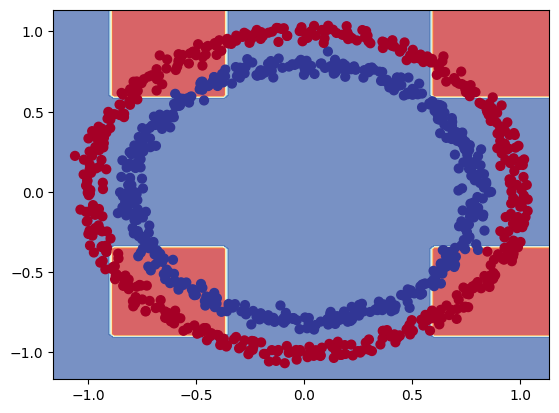

In [28]:
plot_decision_boundary(model_7, X, y)

In [29]:
tf.random.set_seed(42)

# Create a model
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_8.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=['accuracy'])

# Fit the model
history = model_8.fit(X, y, epochs=150, verbose=1)

Epoch 1/150
32/32 [==============================] - 1s 3ms/step - loss: 0.7057 - accuracy: 0.4990
Epoch 2/150
32/32 [==============================] - 0s 3ms/step - loss: 0.6957 - accuracy: 0.5070
Epoch 3/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6900 - accuracy: 0.5210
Epoch 4/150
32/32 [==============================] - 0s 3ms/step - loss: 0.6871 - accuracy: 0.5190
Epoch 5/150
32/32 [==============================] - 0s 3ms/step - loss: 0.6852 - accuracy: 0.5320
Epoch 6/150
32/32 [==============================] - 0s 3ms/step - loss: 0.6837 - accuracy: 0.5370
Epoch 7/150
32/32 [==============================] - 0s 2ms/step - loss: 0.6826 - accuracy: 0.5460
Epoch 8/150
32/32 [==============================] - 0s 3ms/step - loss: 0.6819 - accuracy: 0.5460
Epoch 9/150
32/32 [==============================] - 0s 3ms/step - loss: 0.6810 - accuracy: 0.5440
Epoch 10/150
32/32 [==============================] - 0s 3ms/step - loss: 0.6802 - accuracy: 0.5360
Epoch 11/

In [30]:
model_8.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.3828 - accuracy: 0.9390


[0.38280928134918213, 0.9390000104904175]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


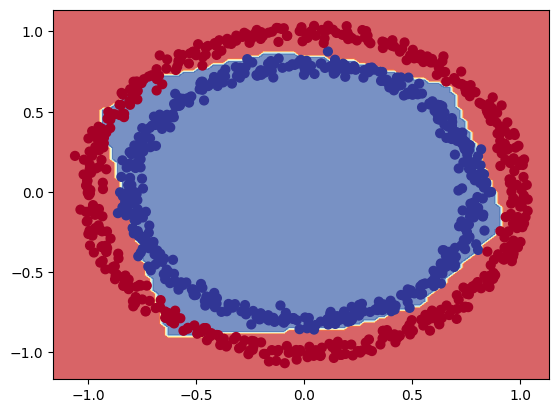

In [31]:
plot_decision_boundary(model_8, X, y)

In [32]:
A = tf.cast(tf.range(-10, 10), tf.float32)

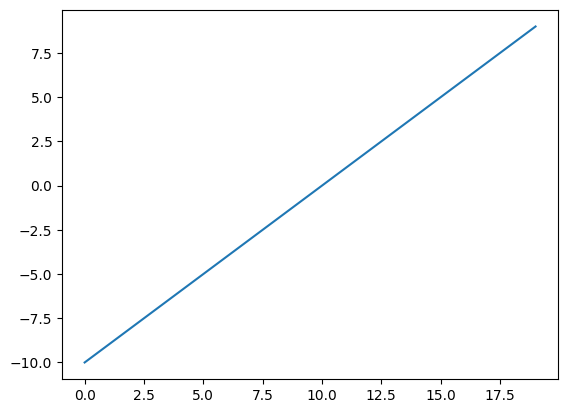

In [33]:
plt.plot(A)

In [34]:
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>


Sigmoid activation function, makine öğreniminde yapay sinir ağlarının katmanlarında kullanılan bir matematiksel fonksiyondur. S-şeklinde bir eğrisi olan sigmoid fonksiyon, bir nevi giriş değerlerini 0 ile 1 arası bir sınıra "sıkıştırır". Bu sıkıştırma sayesinde sinir ağları özellikle olasılık tahmini yapmak için kullanıldığında sigmoid fonksiyon çok faydalı olur. Çünkü olasılıklar daima 0 ile 1 arasında değerler alır.

**Avantajları**:

* Çıktıyı 0 ve 1 arasına sıkıştırmasıyla özellikle sınıflandırma problemlerinde ve olasılık tahminlerinde kullanışlıdır.
* Hesaplanması kolaydır.

**Dezavantajları**:

* Sigmoid fonksiyonunun grafiğinin yatay asimptotları vardır. Bu, sinir ağlarında gradyanların yok olmasına neden olabilir ve ağın öğrenmesini zorlaştırabilir.
* Sigmoid fonksiyonu bazı durumlarda doygunluğa ulaşabilir. Yani, girişteki büyük değişiklikler çıktıdaki küçük değişikliklere yol açabilir.



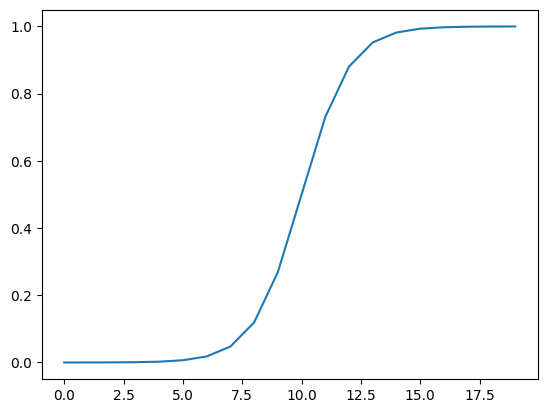

In [35]:
plt.plot(sigmoid(A))

In [36]:
def relu(x):
  return tf.maximum(0, x)

relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

In [37]:
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

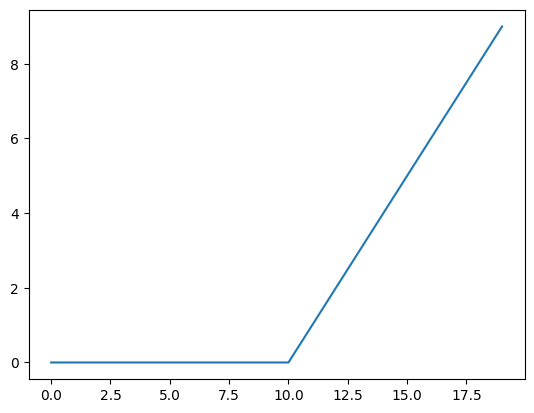

In [38]:
plt.plot(relu(A))

In [39]:
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

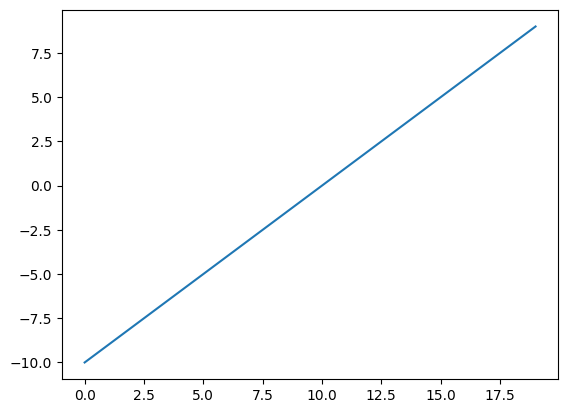

In [40]:
plt.plot(tf.keras.activations.linear(A))

In [41]:
A == tf.keras.activations.linear(A)
# A ve linear A eşit

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

# Classification Modeli Geliştirme

In [42]:
len(X)

1000

In [43]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]


In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [45]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

model_9.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["Accuracy"])

history = model_9.fit(X_train, y_train, epochs=50)

Epoch 1/50
25/25 [==============================] - 1s 2ms/step - loss: 0.6982 - Accuracy: 0.4850
Epoch 2/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6957 - Accuracy: 0.4538
Epoch 3/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6945 - Accuracy: 0.4387
Epoch 4/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6941 - Accuracy: 0.4588
Epoch 5/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6937 - Accuracy: 0.4400
Epoch 6/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6934 - Accuracy: 0.4787
Epoch 7/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6928 - Accuracy: 0.4875
Epoch 8/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6926 - Accuracy: 0.4613
Epoch 9/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6923 - Accuracy: 0.4837
Epoch 10/50
25/25 [==============================] - 0s 2ms/step - loss: 0.6919 - Accuracy: 0.4888
Epoch 11/50
25/25 [

In [46]:
model_9.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.6507 - Accuracy: 0.5800


[0.6507013440132141, 0.5799999833106995]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


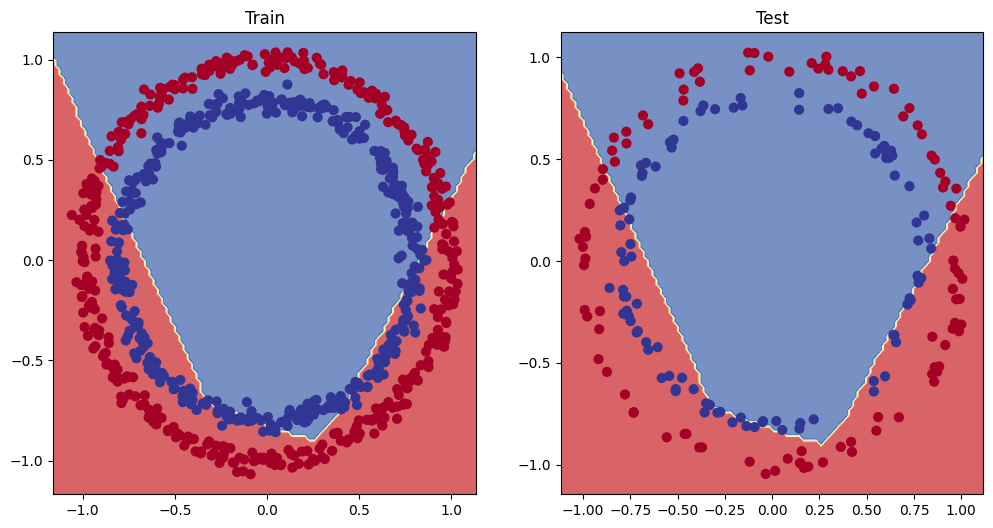

In [47]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_9, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_9, X=X_test, y=y_test)
plt.show()

In [48]:
pd.DataFrame(history.history)

,loss,Accuracy
0,0.698155,0.48500
1,0.695725,0.45375
2,0.694532,0.43875
3,0.694134,0.45875
4,0.693679,0.44000
5,0.693382,0.47875
6,0.692789,0.48750
7,0.692648,0.46125
8,0.692257,0.48375
9,0.691889,0.48875


Text(0.5, 1.0, 'model_9')

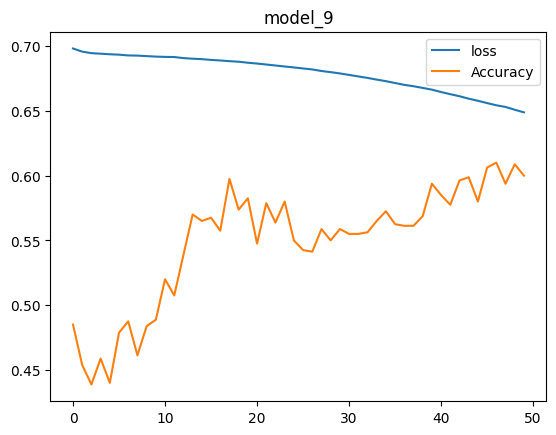

In [49]:
pd.DataFrame(history.history).plot()
plt.title("model_9")

# En iyi Öğrenme yolunu bulma

In [50]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

#learning rate callback
lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_10 = model_10.fit(X_train, y_train, epochs=100,callbacks=[lr_schedular])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7582 - accuracy: 0.5050 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7559 - accuracy: 0.4988 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7534 - accuracy: 0.5013 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7508 - accuracy: 0.4988 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7481 - accuracy: 0.4988 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7454 - accuracy: 0.4950 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7424 - accuracy: 0.4988 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7395 - accuracy: 0.4850 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

**Amaç**:

* *lr_schedular* satırı TensorFlow'un Keras API'sindeki *tf.keras.callbacks.LearningRateScheduler* sınıfından bir geri dönüş nesnesi oluşturur.
* Bu geri dönüş, model eğitimi sırasında önceden belirlenmiş bir zamanlama fonksiyonuna dayanarak öğrenme oranını dinamik olarak ayarlar.

**Parçalar**:

* *tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))* :
* tf.keras.callbacks.LearningRateScheduler: Bu sınıf öğrenme oranı zamanlamasını yönetmekten sorumludur.
* lambda epoch: 1e-4 * 10**(epoch/20): Bu, öğrenme oranı zamanlamasını tanımlayan anonim bir fonksiyondur (lambda fonksiyonu). Mevcut epoch numarasını (epoch) girdi olarak alır ve o epoch için yeni öğrenme oranını döndürür.

**Öğrenme Oranı Zamanlama Fonksiyonu**:

* 1e-4 * 10**(epoch/20): Bu fonksiyon üssel bir öğrenme oranı zamanlaması uygular. Davranışını parçalara ayıralım:
* 1e-4: Bu, epoch 0'daki başlangıç öğrenme oranıdır (0.0001).
*10**(epoch/20): Bu kısım, her 20 epoch'ta bir öğrenme oranını üssel olarak artıran bir faktör hesaplar.
epoch: Mevcut epoch numarası (0'dan başlar).
* /20: Bu, epoch numarasını 20'ye böler.
* 10**: Bu, sonucu 10'a yükseltir ve üssel bir artışa neden olur.

**Eğitim Üzerindeki Etki**:

* Bu zamanlama, modelin erken aşamada sapmasına neden olabilecek büyük güncellemeleri önlemek için nispeten düşük bir öğrenme oranıyla (0.0001) başlar.
*Eğitim ilerledikçe, öğrenme oranı her 20 epoch'ta bir kademeli olarak artar ve modelin ağırlıklarını ince ayarlamasına ve potansiyel olarak daha hızlı bir çözüme yakınlaşmasına olanak tanır.

**Geri Dönüşün Dahil Edilmesi**:

* callbacks=[lr_schedular]: Bu satır, lr_schedular geri dönüş nesnesini model.fit yöntemine gönderilen callbacks listesine dahil eder.
Eğitim sırasında, LearningRateScheduler geri dönüşü her epoch'ın başında çağrılır. Sağlanan zamanlama fonksiyonunu (lambda epoch: 1e-4 * 10**(epoch/20)) çağırarak o epoch için yeni öğrenme oranını alır ve eğitim için kullanılan optimizatörün (genellikle bu durumda Adam) öğrenme oranını günceller.

<Axes: xlabel='epochs'>

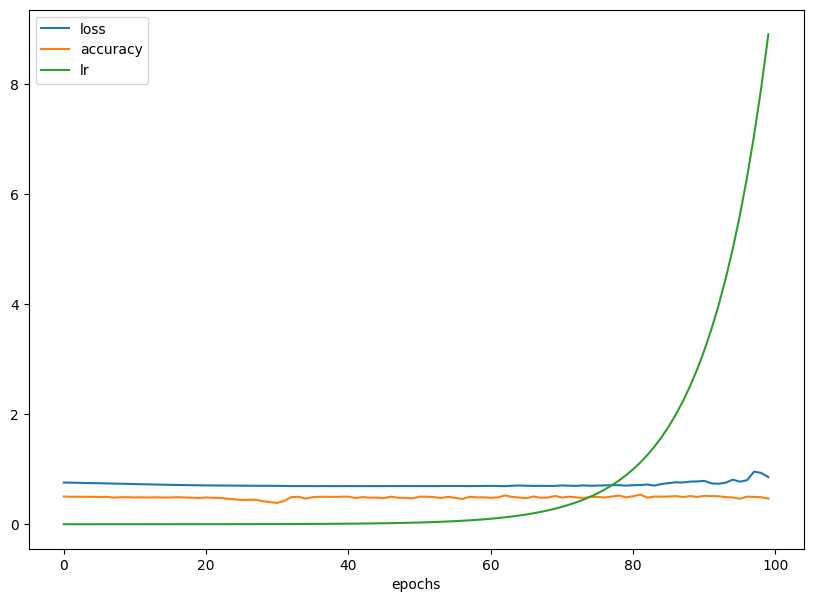

In [51]:
pd.DataFrame(history_10.history).plot(figsize=(10, 7), xlabel="epochs")

Text(0, 0.5, 'loss')

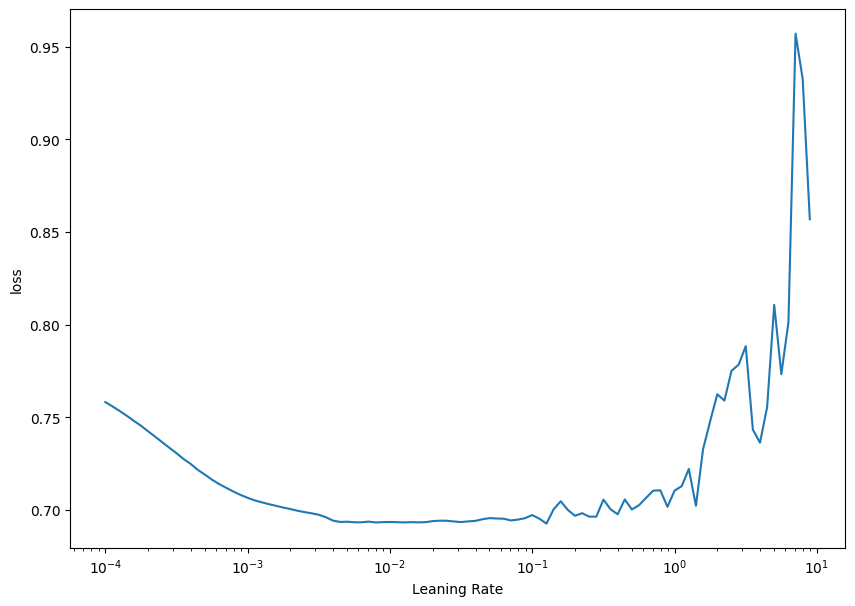

In [52]:
# learning rate ve loss değerini görselleştirme
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_10.history["loss"])
plt.xlabel("Leaning Rate")
plt.ylabel("loss")

In [53]:
len(lrs)

100

In [54]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model_11.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(lr=0.02),
                 metrics=["accuracy"])

history_10 = model_11.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6956 - accuracy: 0.5100
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6948 - accuracy: 0.5088
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6943 - accuracy: 0.5125
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6940 - accuracy: 0.5125
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6936 - accuracy: 0.5150
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5075
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.5088
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5113
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6926 - accuracy: 0.5138
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6923 - accuracy: 0.5150
Epoch 11/

In [55]:
model_11.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1154 - accuracy: 0.9900


[0.11537633836269379, 0.9900000095367432]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


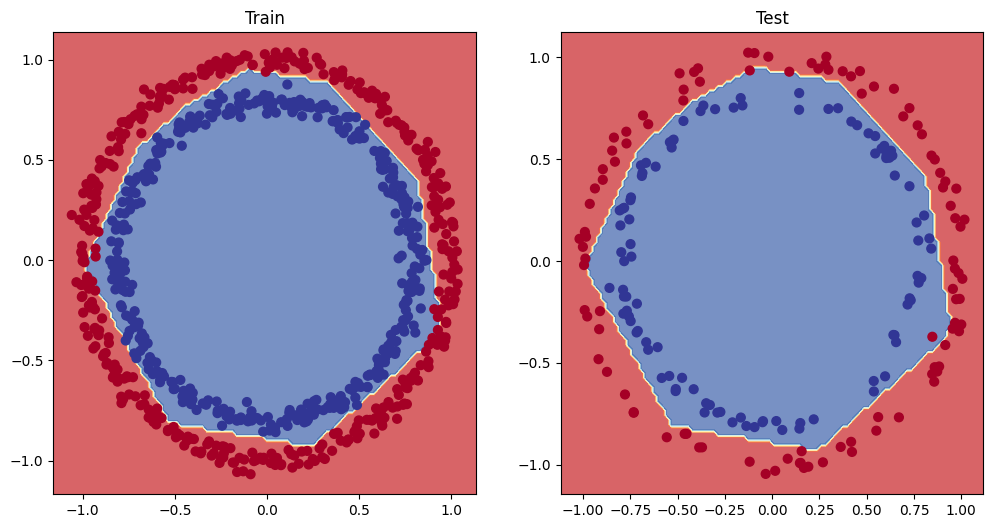

In [56]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_11, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_11, X_test, y_test)
plt.show()

In [60]:
from sklearn.metrics import confusion_matrix

y_preds = model_11.predict(X_test)

confusion_matrix(y_test, tf.round(y_preds))

7/7 [==============================] - 0s 3ms/step


array([[99,  2],
       [ 0, 99]])